### Project 3 Title

#### Links: 

Propublica

[Propublica API](https://projects.propublica.org/api-docs/congress-api/)

FBI Uniform Crime Reporting: Violent Crime Rate by State

- Survey time period: 2017
- Rates are the number of reported offenses per 100,000 of the population.

- In the FBI’s Uniform Crime Reporting (UCR) Program, violent crime is composed of four offenses: murder and nonnegligent manslaughter, forcible rape, robbery, and aggravated assault. Violent crimes are defined in the UCR Program as those offenses which involve force or threat of force. Due to changes in the state/local agency's reporting practices, figures are not comparable to previous years' data.

[FBI Uniform Crime Reporting](https://ucr.fbi.gov/crime-in-the-u.s/2017/crime-in-the-u.s.-2017/topic-pages/violent-crime)

In [1]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style = "fivethirtyeight"
import json
import re
import numpy as np
import seaborn as sns
from foobar import api_key


In [2]:
congress = "115"
chamber = "house"
session_number = "2"
roll_call_number = "215"
url = "https://api.propublica.org/congress/v1/{}/{}/sessions/{}/votes/{}.json".format(congress, 
                                                                                      chamber, 
                                                                                      session_number, 
                                                                                      roll_call_number)
headers = {"X-API-Key": api_key}

resp = requests.get(url, headers=headers)
if resp.status_code != 200:
    raise ValueError("Error getting data from ProPublica: Response Code {}".format(resp.status_code))

In [3]:
print(resp.text)

{
   "status":"OK",
   "copyright":"Copyright (c) 2019 Pro Publica Inc. All Rights Reserved.",
   "results": {
      "votes": {
        "vote": {
           "congress": 115,
           "session": 2,
           "chamber": "House",
           "roll_call": 215,
           "source": "http://clerk.house.gov/evs/2018/roll215.xml",
           "url": "http://clerk.house.gov/evs/2018/roll215.xml",
            "bill": {
            "bill_id": "hr5682-115",
            "number": "H.R.5682",
            "api_uri": "https://api.propublica.org/congress/v1/115/bills/hr5682.json",
            "title": "To provide for programs to help reduce the risk that prisoners will recidivate upon release from prison, and for other purposes.",
            "short_title": "FIRST STEP Act",
            "latest_action": "Received in the Senate."
            },
            "amendment": {
            },
                      "question": "On Motion to Suspend the Rules and Pass, as Amended",
           "question_text": "

In [4]:
data = json.loads(resp.text)

In [5]:
data["results"]["votes"]["vote"]["positions"]

[{'member_id': 'A000374',
  'name': 'Ralph Abraham',
  'party': 'R',
  'state': 'LA',
  'district': '5',
  'vote_position': 'Yes',
  'dw_nominate': 0.508},
 {'member_id': 'A000370',
  'name': 'Alma Adams',
  'party': 'D',
  'state': 'NC',
  'district': '12',
  'vote_position': 'Yes',
  'dw_nominate': -0.469},
 {'member_id': 'A000055',
  'name': 'Robert B. Aderholt',
  'party': 'R',
  'state': 'AL',
  'district': '4',
  'vote_position': 'Yes',
  'dw_nominate': 0.361},
 {'member_id': 'A000371',
  'name': 'Pete Aguilar',
  'party': 'D',
  'state': 'CA',
  'district': '31',
  'vote_position': 'Yes',
  'dw_nominate': -0.285},
 {'member_id': 'A000372',
  'name': 'Rick Allen',
  'party': 'R',
  'state': 'GA',
  'district': '12',
  'vote_position': 'Yes',
  'dw_nominate': 0.611},
 {'member_id': 'A000367',
  'name': 'Justin Amash',
  'party': 'R',
  'state': 'MI',
  'district': '3',
  'vote_position': 'Yes',
  'dw_nominate': 0.648},
 {'member_id': 'A000369',
  'name': 'Mark Amodei',
  'party': 

In [6]:
house_vote_df = pd.DataFrame(data["results"]["votes"]["vote"]["positions"])

In [7]:
house_vote_df

,district,dw_nominate,member_id,name,party,state,vote_position
0,5,0.508,A000374,Ralph Abraham,R,LA,Yes
1,12,-0.469,A000370,Alma Adams,D,NC,Yes
2,4,0.361,A000055,Robert B. Aderholt,R,AL,Yes
3,31,-0.285,A000371,Pete Aguilar,D,CA,Yes
4,12,0.611,A000372,Rick Allen,R,GA,Yes
5,3,0.648,A000367,Justin Amash,R,MI,Yes
6,2,0.375,A000369,Mark Amodei,R,NV,Yes
7,19,0.549,A000375,Jodey Arrington,R,TX,Yes
8,36,0.693,B001291,Brian Babin,R,TX,Yes
9,2,0.432,B001298,Don Bacon,R,NE,Yes


In [8]:
congress = "115"
chamber = "senate"
session_number = "2"
roll_call_number = "267"
url = "https://api.propublica.org/congress/v1/{}/{}/sessions/{}/votes/{}.json".format(congress, 
                                                                                      chamber, 
                                                                                      session_number, 
                                                                                      roll_call_number)

resp2 = requests.get(url, headers=headers)
if resp.status_code != 200:
    raise ValueError("Error getting data from ProPublica: Response Code {}".format(resp.status_code))

In [9]:
data = json.loads(resp2.text)

In [10]:
senate_vote_df = pd.DataFrame(data["results"]["votes"]["vote"]["positions"])

In [11]:
print(resp2.text)

{
   "status":"OK",
   "copyright":"Copyright (c) 2019 Pro Publica Inc. All Rights Reserved.",
   "results": {
      "votes": {
        "vote": {
           "congress": 115,
           "session": 2,
           "chamber": "Senate",
           "roll_call": 267,
           "source": "https://www.senate.gov/legislative/LIS/roll_call_votes/vote1152/vote_115_2_00267.xml",
           "url": "https://www.senate.gov/legislative/LIS/roll_call_lists/roll_call_vote_cfm.cfm?congress=115&session=2&vote=00267",
            "bill": {
            "bill_id": "s756-115",
            "number": "S.756",
            "api_uri": "https://api.propublica.org/congress/v1/115/bills/s756.json",
            "title": "A bill to reauthorize and amend the Marine Debris Act to promote international action to reduce marine debris, and for other purposes.",
            "short_title": "First Step Act of 2018",
            "latest_action": "Signed by President."
            },
            "amendment": {
            },
    

In [12]:
senate_vote_df

,dw_nominate,member_id,name,party,state,vote_position
0,0.323,A000360,Lamar Alexander,R,TN,Not Voting
1,-0.522,B001230,Tammy Baldwin,D,WI,Yes
2,0.534,B001261,John Barrasso,R,WY,No
3,-0.207,B001267,Michael Bennet,D,CO,Yes
4,-0.417,B001277,Richard Blumenthal,D,CT,Yes
5,0.430,B000575,Roy Blunt,R,MO,Yes
6,-0.612,B001288,Cory Booker,D,NJ,Yes
7,0.401,B001236,John Boozman,R,AR,Yes
8,-0.438,B000944,Sherrod Brown,D,OH,Yes
9,0.453,B001135,Richard M. Burr,R,NC,No


In [13]:
senate_vote_df["state"].unique()

array(['TN', 'WI', 'WY', 'CO', 'CT', 'MO', 'NJ', 'AR', 'OH', 'NC', 'WA',
       'WV', 'MD', 'DE', 'PA', 'LA', 'ME', 'TX', 'NV', 'ID', 'MT', 'IN',
       'IL', 'IA', 'CA', 'NE', 'AZ', 'NY', 'SC', 'NH', 'UT', 'NM', 'ND',
       'HI', 'MS', 'OK', 'GA', 'AL', 'VA', 'MN', 'VT', 'MA', 'KY', 'OR',
       'KS', 'AK', 'FL', 'MI', 'RI', 'SD'], dtype=object)

In [15]:
senate_vote_df[senate_vote_df["vote_position"]=="Not Voting"]

,dw_nominate,member_id,name,party,state,vote_position
0,0.323,A000360,Lamar Alexander,R,TN,Not Voting
15,0.452,C001075,Bill Cassidy,R,LA,Not Voting
35,0.408,G000359,Lindsey Graham,R,SC,Not Voting
42,0.463,H001041,Dean Heller,R,NV,Not Voting
48,0.602,J000293,Ron Johnson,R,WI,Not Voting
90,0.424,T000476,Thom Tillis,R,NC,Not Voting


In [16]:
house_vote_df

,district,dw_nominate,member_id,name,party,state,vote_position
0,5,0.508,A000374,Ralph Abraham,R,LA,Yes
1,12,-0.469,A000370,Alma Adams,D,NC,Yes
2,4,0.361,A000055,Robert B. Aderholt,R,AL,Yes
3,31,-0.285,A000371,Pete Aguilar,D,CA,Yes
4,12,0.611,A000372,Rick Allen,R,GA,Yes
5,3,0.648,A000367,Justin Amash,R,MI,Yes
6,2,0.375,A000369,Mark Amodei,R,NV,Yes
7,19,0.549,A000375,Jodey Arrington,R,TX,Yes
8,36,0.693,B001291,Brian Babin,R,TX,Yes
9,2,0.432,B001298,Don Bacon,R,NE,Yes


In [17]:
senate_vote_df.isna().sum()

dw_nominate      1
member_id        0
name             0
party            0
state            0
vote_position    0
dtype: int64

In [18]:
house_vote_df[house_vote_df["vote_position"]=="Not Voting"]

,district,dw_nominate,member_id,name,party,state,vote_position
25,6,0.580,B001273,Diane Black,R,TN,Not Voting
132,11,0.292,F000372,Rodney Frelinghuysen,R,NJ,Not Voting
170,3,0.531,H001077,Clay Higgins,R,LA,Not Voting
298,2,0.472,P000588,Steve Pearce,R,NM,Not Voting
324,5,0.333,R000395,Harold Rogers,R,KY,Not Voting
373,14,-0.383,S001175,Jackie Speier,D,CA,Not Voting
376,15,0.299,S001187,Steve Stivers,R,OH,Not Voting
406,1,-0.275,W000799,Tim Walz,D,MN,Not Voting


#### Crime Rate by State 
FBI UCR Crime Statistics 2017

[FBI]

In [19]:
header = ["states", "area", "pct_reporting", "population", "violent_crime", "murder_manslaughter", 
         "rape", "robbery", "aggravated_assault", "property_crime", "burglary", "larceny_theft", 
         "motor_theft", "none1", "none2"]
crime_df = pd.read_excel("crime_rate_by_state.xls", names=header )

In [20]:
crime_df.shape

(512, 15)

In [21]:
crime_df.drop(crime_df.index[0:3], inplace=True)
crime_df.drop(["none1", "none2"], axis=1, inplace=True)
crime_df.head()

,states,area,pct_reporting,population,violent_crime,murder_manslaughter,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_theft
3,ALABAMA,Metropolitan Statistical Area,NaN,3732789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Area actually reporting,0.99,20396,337,1535,3706,14818,114790,24598,79734,10458
5,NaN,NaN,Estimated total,1,20585,340,1548,3738,14959,116031,24809,80666,10556
6,NaN,Cities outside metropolitan areas,NaN,518602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,Area actually reporting,0.943,3526,38,264,366,2858,19732,3964,14367,1401


In [22]:
crime_df.drop(crime_df.index[-5:], inplace=True)
crime_df.tail(10)

,states,area,pct_reporting,population,violent_crime,murder_manslaughter,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_theft
497,WYOMING,Metropolitan Statistical Area,NaN,178138,,NaN,NaN,NaN,NaN,,NaN,NaN,NaN
498,NaN,NaN,Area actually reporting,1,465,6,94,55,310,4881,784,3678,419
499,NaN,Cities outside metropolitan areas,NaN,245155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,NaN,NaN,Area actually reporting,0.957,563,3,107,18,435,4400,555,3598,247
501,NaN,NaN,Estimated total,1,589,3,112,19,455,4597,580,3759,258
502,NaN,Nonmetropolitan counties,NaN,156022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,NaN,NaN,Area actually reporting,0.889,285,5,49,2,229,1002,204,707,91
504,NaN,NaN,Estimated total,1,322,6,57,2,257,1126,229,795,102
505,NaN,State Total,NaN,579315,1376,15,263,76,1022,10604,1593,8232,779
506,NaN,NaN,"Rate per 100,000 inhabitants",NaN,237.5,2.6,45.4,13.1,176.4,1830.4,275,1421,134.5


In [23]:
crime_df["states"].unique()

array(['ALABAMA', nan, 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT OF COLUMBIA3',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE',
       'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA4',
       'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'PUERTO RICO', 'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA',
       'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST VIRGINIA', 'WISCONSIN', 'WYOMING'], dtype=object)

### Crime Rate by State 
FBI UCR Crime Statistics Violent Crime by Region/State 2016 - 2017

[FBI UCR Crime table 4](https://ucr.fbi.gov/crime-in-the-u.s/2017/crime-in-the-u.s.-2017/topic-pages/tables/table-4)

In [24]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [25]:
state_abrv = {v:k for k,v in states.items()}

In [26]:
headers = ["area", "year", "population", "violent_crime", "violent_crime_per100k", "murder_manslaughter", 
           "murder_manslaughter_per100k", "rape", "rape_per100k", "robbery", "robbery_per100k", 
           "aggravated_assault", "aggravated_assault_per100k", "property_crime", "property_crime_per100k", 
           "burglary", "burglary_per100k", "larceny_theft", "larceny_theft_per100k", "motor_vehicle_theft", 
           "motor_vehicle_theft_per100k", "none1", "none2", "none3"]
crime_df = pd.read_excel("crime_rate_by_region.xls", names=headers )

In [27]:
crime_df.drop(crime_df.index[:4], inplace=True)
crime_df

,area,year,population,violent_crime,violent_crime_per100k,murder_manslaughter,murder_manslaughter_per100k,rape,rape_per100k,robbery,...,property_crime_per100k,burglary,burglary_per100k,larceny_theft,larceny_theft_per100k,motor_vehicle_theft,motor_vehicle_theft_per100k,none1,none2,none3
4,"United States Total5, 6",2016,323405935,1285606,397.5,17413,5.4,132414,40.9,332797,...,2451.6,1516405,468.9,5644835,1745.4,767290,237.3,NaN,,NaN
5,NaN,2017,325719178,1283220,394,17284,5.3,135755,41.7,319356,...,2362.2,1401840,430.4,5519107,1694.4,773139,237.4,NaN,NaN,NaN
6,NaN,Percent change,NaN,-0.2,-0.9,-0.7,-1.4,2.5,1.8,-4,...,-3.6,-7.6,-8.2,-2.2,-2.9,0.8,*,NaN,NaN,NaN
7,Northeast,2016,56359360,178406,316.6,1977,3.5,16763,29.7,52958,...,1610.7,142092,252.1,708772,1257.6,56917,101,,NaN,NaN
8,NaN,2017,56470581,172042,304.7,1957,3.5,16863,29.9,48714,...,1558.6,127908,226.5,695447,1231.5,56799,100.6,NaN,NaN,NaN
9,NaN,Percent change,NaN,-3.6,-3.8,-1,-1.2,0.6,0.4,-8,...,-3.2,-10,-10.2,-1.9,-2.1,-0.2,-0.4,NaN,,NaN
10,New England,2016,14757573,41841,283.5,296,2,4569,31,9394,...,1640.9,41835,283.5,182176,1234.5,18140,122.9,NaN,,NaN
11,NaN,2017,14810001,40519,273.6,346,2.3,4833,32.6,8918,...,1541.5,36958,249.5,173101,1168.8,18234,123.1,NaN,NaN,NaN
12,NaN,Percent change,,-3.2,-3.5,16.9,16.5,5.8,5.4,-5.1,...,-6.1,-11.7,-12,-5,-5.3,0.5,0.2,NaN,NaN,NaN
13,Connecticut,2016,3587685,8169,227.7,79,2.2,791,22,2711,...,1808.3,10107,281.7,47642,1327.9,7126,198.6,NaN,NaN,NaN


In [28]:
private_prison_pop_df = pd.read_csv('pp_pop.csv', skiprows = 8, header = 1)
private_prison_pop_df.rename(columns = {'Unnamed: 1':'State'}, inplace = True)
private_prison_pop_df.drop(index = ([54,55,56,57,58,59,60,61]), inplace = True)
private_prison_pop_df

,Jurisdiction,State,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,U.S. total,NaN,"68,960","91,579","86,421","88,370","90,123","92,569","107,433","113,697","124,150","129,482","129,333","127,945","130,972","137,220","133,363","131,723","126,272","128,323"
1,Federal/a,NaN,"3,828","15,524","12,736","14,732","16,281","18,709","27,046","27,726","31,310","33,162","34,087","33,830","38,546","40,446","41,159","40,017","34,934","34,159"
2,State,NaN,"65,132","76,055","73,685","73,638","73,842","73,860","80,387","85,971","92,840","96,320","95,246","94,115","92,426","96,774","92,204","91,706","91,338","94,164"
3,NaN,Alabama,0,0,0,0,"1,698",244,320,9,355,101,883,"1,024",545,538,554,481,398,348
4,NaN,Alaska/b,"1,387","1,383","1,537","1,360","1,386","1,392","1,365","1,681","1,524","1,450","1,626","1,598","1,688","1,733",27,595,593,551
5,NaN,Arizona,"1,392","1,430","1,429","1,965","2,323","4,176","4,800","5,213","7,790","8,369","8,971","5,356","6,457","6,435","6,405","6,955","6,471","8,285"
6,NaN,Arkansas,"1,214","1,540",0,0,0,0,0,/,/,/,/,0,0,0,0,0,0,0
7,NaN,California,"4,621","4,547","4,452","4,649","3,507","2,989","2,801","2,844","3,032","3,019","2,316","2,170",697,608,"2,026","2,376","2,195","7,005"
8,NaN,Colorado,0,"2,099","2,390","2,452","3,013","2,819","4,039","4,855","4,878","5,274","4,957","4,498","4,303","3,939","3,898","3,782","3,987","3,564"
9,NaN,Connecticut/b,0,/,/,0,0,0,0,0,0,927,885,883,855,817,725,647,524,508


In [29]:
private_prison_pop_df.drop(['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
                            '2007', '2008', '2009'], axis = 1, inplace = True)

## Federal Bureau of Prisons


In [30]:
url = 'http://www.bop.gov/PublicInfo/execute/locations/?todo=query&output=json '
r = requests.get(url)

bop_facilities = r.json()['Locations']
bop_facilities = pd.DataFrame(bop_facilities)
bop_facilities.drop(['address', 'code', 'complexCode', 'contactEmail',
       'gender', 'hasCamp', 'hasFdc', 'hasFsl',
       'hasIhp', 'hasSff', 'imageNormal', 'imageSmall', 'latitude',
       'locationtype', 'longitude', 'name', 'nameDisplay', 'nameTitle',
       'phoneNumber', 'region', 'securityLevel', 'special',
       'timeZone', 'url', 'zipCode'], axis = 1, inplace = True)
bop_facilities

,city,faclTypeDescription,privateFacl,state,type
0,NATCHEZ,Correctional Institution,t,MS,CI
1,ALDERSON,Federal Prison Camp,f,WV,FPC
2,ALICEVILLE,Federal Correctional Institution,f,AL,FCI
3,ALLENWOOD,Federal Correctional Institution,f,PA,FCI
4,WHITE DEER,Federal Correctional Institution,f,PA,FCI
5,MONTGOMERY,Federal Correctional Complex,f,PA,FCC
6,ALLENWOOD,U.S. Penitentiary,f,PA,USP
7,ASHLAND,Federal Correctional Institution,f,KY,FCI
8,ATLANTA,Residential Reentry Office,f,GA,RRM
9,ATLANTA,U.S. Penitentiary,f,GA,USP


## GEO Congress donations

In [31]:
house_2016_geo_df = pd.read_csv('2016_geo_house.csv', header = 1)

In [32]:
house_2016_geo_df.drop(['Unnamed: 0','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'], axis = 1, inplace = True)

In [33]:
house_2016_geo_df

,Name,Donation_Amount
0,"Bacon, Donald John (R-NE)","$5,000"
1,"Barton, Joe (R-TX)","$2,500"
2,"Bergman, John (R-MI)","$5,000"
3,"Bishop, Mike (R-MI)","$6,000"
4,"Blum, Rod (R-IA)","$5,000"
5,"Brady, Kevin (R-TX)","$5,000"
6,"Carter, John (R-TX)","$2,500"
7,"Comstock, Barbara (R-VA)","$5,000"
8,"Cuellar, Henry (D-TX)","$9,690"
9,"Culberson, John (R-TX)","$5,000"


In [34]:
house_vote_df

,district,dw_nominate,member_id,name,party,state,vote_position
0,5,0.508,A000374,Ralph Abraham,R,LA,Yes
1,12,-0.469,A000370,Alma Adams,D,NC,Yes
2,4,0.361,A000055,Robert B. Aderholt,R,AL,Yes
3,31,-0.285,A000371,Pete Aguilar,D,CA,Yes
4,12,0.611,A000372,Rick Allen,R,GA,Yes
5,3,0.648,A000367,Justin Amash,R,MI,Yes
6,2,0.375,A000369,Mark Amodei,R,NV,Yes
7,19,0.549,A000375,Jodey Arrington,R,TX,Yes
8,36,0.693,B001291,Brian Babin,R,TX,Yes
9,2,0.432,B001298,Don Bacon,R,NE,Yes


In [35]:
house_vote_df[(house_vote_df["state"] == "NE") & 
                           (house_vote_df["party"] == "R") & 
                           (house_vote_df["name"].str.find("Bacon")!=-1)]

,district,dw_nominate,member_id,name,party,state,vote_position
9,2,0.432,B001298,Don Bacon,R,NE,Yes


In [36]:
member_id = ["B001298","B000213","B001301","B001293","B001294","B000755","C001051","C001105","C001063","C001048",
             "C001107","D000612","didnt_vote","G000289","G000566","didnt_vote","didnt_vote","H001073","I000056",
             "didnt_vote","K000386","K000379","K000387","didnt_vote","M001157","didnt_vote","didn't_vote","R000578",
             "R000486","R000604","R000609","S001172","didnt_vote","T000478","T000193","T000470","V000129","W000798",
             "Y000063"]

house_2016_geo_df["member_id_check"] = member_id

In [37]:
house_2016_geo_df["member_id"] = np.nan

In [38]:
house_2016_geo_df

,Name,Donation_Amount,member_id_check,member_id
0,"Bacon, Donald John (R-NE)","$5,000",B001298,NaN
1,"Barton, Joe (R-TX)","$2,500",B000213,NaN
2,"Bergman, John (R-MI)","$5,000",B001301,NaN
3,"Bishop, Mike (R-MI)","$6,000",B001293,NaN
4,"Blum, Rod (R-IA)","$5,000",B001294,NaN
5,"Brady, Kevin (R-TX)","$5,000",B000755,NaN
6,"Carter, John (R-TX)","$2,500",C001051,NaN
7,"Comstock, Barbara (R-VA)","$5,000",C001105,NaN
8,"Cuellar, Henry (D-TX)","$9,690",C001063,NaN
9,"Culberson, John (R-TX)","$5,000",C001048,NaN


In [39]:
name = house_2016_geo_df["Name"][0]
name

'Bacon, Donald John (R-NE)'

In [40]:
house_2016_geo_df.loc[26, "member_id_check"] = "didnt_vote"

In [61]:
def name_to_mem_id(roll_call_df, donation_df):
# Takes the donated name and match with the roll call id number
    for idx, row in donation_df.iterrows():
        name_pattern = re.match(r'(\w+?\s?-?\w+),\s(\w+?\s?-?\w+)\s\(([D|R|I])-(\w{2})\)', row["Name"])
        last_name = name_pattern.group(1)
        first_name = name_pattern.group(2)
        party = name_pattern.group(3)
        state = name_pattern.group(4)
        search = roll_call_df["member_id"][(roll_call_df["state"] == state) & 
                                            (roll_call_df["party"] == party) & 
                                            (roll_call_df["name"].str.find(last_name)!=-1)]
        if search.size == 1:
            donation_df.loc[idx, "member_id"] = search.values[0]
        elif search.size > 1:
            donation_df.loc[idx, "member_id"] = "ambiguous"
        else:
            donation_df.loc[idx, "member_id"] = "didnt_vote"
    return donation_df


In [62]:
name_to_mem_id(house_vote_df, house_2016_geo_df)


,Name,Donation_Amount,member_id_check,member_id
0,"Bacon, Donald John (R-NE)","$5,000",B001298,B001298
1,"Barton, Joe (R-TX)","$2,500",B000213,B000213
2,"Bergman, John (R-MI)","$5,000",B001301,B001301
3,"Bishop, Mike (R-MI)","$6,000",B001293,B001293
4,"Blum, Rod (R-IA)","$5,000",B001294,B001294
5,"Brady, Kevin (R-TX)","$5,000",B000755,B000755
6,"Carter, John (R-TX)","$2,500",C001051,C001051
7,"Comstock, Barbara (R-VA)","$5,000",C001105,C001105
8,"Cuellar, Henry (D-TX)","$9,690",C001063,C001063
9,"Culberson, John (R-TX)","$5,000",C001048,C001048


In [64]:
house_2016_geo_df.drop("member_id_check", axis=1, inplace=True)

In [43]:
senate_2018_geo_df = pd.read_csv('2018_geo_senate.csv', header = 1)

In [44]:
senate_2018_geo_df.drop(['Unnamed: 0','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'], axis = 1, inplace = True)

In [45]:
senate_2018_geo_df

,Name,Donation_Amount
0,"Blackburn, Marsha (R-TN)","$5,000"
1,"Boozman, John (R-AR)","$2,500"
2,"Cassidy, Bill (R-LA)","$5,000"
3,"Coons, Chris (D-DE)",$0
4,"Cornyn, John (R-TX)","$5,000"
5,"Cramer, Kevin (R-ND)","$5,000"
6,"Durbin, Dick (D-IL)",$0
7,"Graham, Lindsey (R-SC)","$5,000"
8,"Grassley, Chuck (R-IA)","$5,000"
9,"Hatch, Orrin G (R-UT)",$0


In [66]:
senate_2016_geo_df = pd.read_csv('2016_geo_senate.csv', header = 1)

In [67]:
senate_2016_geo_df.drop(['Unnamed: 0','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'], axis = 1, inplace=True)

In [68]:
name_to_mem_id(senate_vote_df, senate_2016_geo_df)

,Name,Donation_Amount,member_id
0,"Ayotte, Kelly (R-NH)","$5,000",didnt_vote
1,"Blunt, Roy (R-MO)","$5,000",B000575
2,"Burr, Richard (R-NC)","$5,000",B001135
3,"Cornyn, John (R-TX)","($2,000)",C001056
4,"Hatch, Orrin G (R-UT)","$5,000",H000338
5,"Heck, Joe (R-NV)","$5,000",didnt_vote
6,"Hoeven, John (R-ND)","$2,500",H001061
7,"Isakson, Johnny (R-GA)","$5,000",I000055
8,"Johnson, Ron (R-WI)","$7,500",J000293
9,"Lee, Mike (R-UT)","$10,000",L000577


In [80]:
house_2016_cc_df = pd.read_csv('2016_cc_house.csv', header = 1)

In [81]:
house_2016_cc_df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'], axis = 1, inplace=True)

In [82]:
search = house_vote_df[(house_vote_df["state"] == "TN") & 
                                            (house_vote_df["party"] == "R") & 
                                            (house_vote_df["name"].str.find("Black")!=-1)]
search

,district,dw_nominate,member_id,name,party,state,vote_position
25,6,0.580,B001273,Diane Black,R,TN,Not Voting
26,7,0.615,B001243,Marsha Blackburn,R,TN,Yes


In [83]:
name_to_mem_id(house_vote_df, house_2016_cc_df)

,Name,Donation_Amount,member_id
0,"Aderholt, Robert B (R-AL)","$2,500.00",A000055
1,"Babeu, Paul (R-AZ)","$1,000.00",didnt_vote
2,"Bishop, Sanford (D-GA)","$2,500.00",B000490
3,"Black, Diane (R-TN)","$6,000.00",ambiguous
4,"Blackburn, Marsha (R-TN)","$4,500.00",B001243
5,"Boehner, John (R-OH)","($5,000.00)",didnt_vote
6,"Carter, John (R-TX)","$5,000.00",C001051
7,"Conaway, Mike (R-TX)","$2,500.00",C001062
8,"Crenshaw, Ander (R-FL)","$5,000.00",didnt_vote
9,"Cuellar, Henry (D-TX)","$4,000.00",C001063


In [86]:
house_2016_cc_df.loc[[3], ["member_id"]] = "B001273"

In [87]:
house_2016_cc_df

,Name,Donation_Amount,member_id
0,"Aderholt, Robert B (R-AL)","$2,500.00",A000055
1,"Babeu, Paul (R-AZ)","$1,000.00",didnt_vote
2,"Bishop, Sanford (D-GA)","$2,500.00",B000490
3,"Black, Diane (R-TN)","$6,000.00",B001273
4,"Blackburn, Marsha (R-TN)","$4,500.00",B001243
5,"Boehner, John (R-OH)","($5,000.00)",didnt_vote
6,"Carter, John (R-TX)","$5,000.00",C001051
7,"Conaway, Mike (R-TX)","$2,500.00",C001062
8,"Crenshaw, Ander (R-FL)","$5,000.00",didnt_vote
9,"Cuellar, Henry (D-TX)","$4,000.00",C001063


In [88]:
senate_2016_cc_df = pd.read_csv('2016_cc_senate.csv', header = 1)

In [89]:
senate_2016_cc_df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6'], axis = 1, inplace=True)

In [90]:
name_to_mem_id(senate_vote_df, senate_2016_cc_df)

,Name,Donation_Amount,member_id
0,"Ayotte, Kelly (R-NH)","$2,500.00",didnt_vote
1,"Blunt, Roy (R-MO)","$2,500.00",B000575
2,"Boozman, John (R-AR)","$3,000.00",B001236
3,"Burr, Richard (R-NC)","$2,500.00",B001135
4,"Hatch, Orrin G (R-UT)","$2,500.00",H000338
5,"Heck, Joe (R-NV)","$2,500.00",didnt_vote
6,"Hoeven, John (R-ND)","$6,000.00",H001061
7,"Isakson, Johnny (R-GA)","$2,500.00",I000055
8,"McCain, John (R-AZ)","$1,000.00",didnt_vote
9,"Moran, Jerry (R-KS)","$2,500.00",M000934


In [93]:
temp_df = house_vote_df.merge(house_2016_geo_df, how='left', on='member_id')
h_votes_donations = temp_df.merge(house_2016_cc_df, how='left', on='member_id')
h_votes_donations

,district,dw_nominate,member_id,name,party,state,vote_position,Name_x,Donation_Amount_x,Name_y,Donation_Amount_y
0,5,0.508,A000374,Ralph Abraham,R,LA,Yes,NaN,NaN,NaN,NaN
1,12,-0.469,A000370,Alma Adams,D,NC,Yes,NaN,NaN,NaN,NaN
2,4,0.361,A000055,Robert B. Aderholt,R,AL,Yes,NaN,NaN,"Aderholt, Robert B (R-AL)","$2,500.00"
3,31,-0.285,A000371,Pete Aguilar,D,CA,Yes,NaN,NaN,NaN,NaN
4,12,0.611,A000372,Rick Allen,R,GA,Yes,NaN,NaN,NaN,NaN
5,3,0.648,A000367,Justin Amash,R,MI,Yes,NaN,NaN,NaN,NaN
6,2,0.375,A000369,Mark Amodei,R,NV,Yes,NaN,NaN,NaN,NaN
7,19,0.549,A000375,Jodey Arrington,R,TX,Yes,NaN,NaN,NaN,NaN
8,36,0.693,B001291,Brian Babin,R,TX,Yes,NaN,NaN,NaN,NaN
9,2,0.432,B001298,Don Bacon,R,NE,Yes,"Bacon, Donald John (R-NE)","$5,000",NaN,NaN


In [95]:
temp_df = senate_vote_df.merge(senate_2016_geo_df, how='left', on='member_id')
s_votes_donations = temp_df.merge(senate_2016_cc_df, how='left', on='member_id')
s_votes_donations

,dw_nominate,member_id,name,party,state,vote_position,Name_x,Donation_Amount_x,Name_y,Donation_Amount_y
0,0.323,A000360,Lamar Alexander,R,TN,Not Voting,NaN,NaN,NaN,NaN
1,-0.522,B001230,Tammy Baldwin,D,WI,Yes,NaN,NaN,NaN,NaN
2,0.534,B001261,John Barrasso,R,WY,No,NaN,NaN,NaN,NaN
3,-0.207,B001267,Michael Bennet,D,CO,Yes,NaN,NaN,NaN,NaN
4,-0.417,B001277,Richard Blumenthal,D,CT,Yes,NaN,NaN,NaN,NaN
5,0.430,B000575,Roy Blunt,R,MO,Yes,"Blunt, Roy (R-MO)","$5,000","Blunt, Roy (R-MO)","$2,500.00"
6,-0.612,B001288,Cory Booker,D,NJ,Yes,NaN,NaN,NaN,NaN
7,0.401,B001236,John Boozman,R,AR,Yes,NaN,NaN,"Boozman, John (R-AR)","$3,000.00"
8,-0.438,B000944,Sherrod Brown,D,OH,Yes,NaN,NaN,NaN,NaN
9,0.453,B001135,Richard M. Burr,R,NC,No,"Burr, Richard (R-NC)","$5,000","Burr, Richard (R-NC)","$2,500.00"


In [96]:
h_votes_donations.drop(['Name_x', 'Name_y'], axis =1, inplace=True)

In [97]:
s_votes_donations.drop(['Name_x', 'Name_y'], axis =1, inplace=True)

In [120]:
h_votes_donations.sample(50)

,district,dw_nominate,member_id,name,party,state,vote_position,2016_GEO_Donation,2016_CC_Donation
47,1,0.544,B001289,Bradley Byrne,R,AL,Yes,$0,$0
365,8,-0.405,S001165,Albio Sires,D,NJ,No,$0,$0
106,25,0.276,D000600,Mario Diaz-Balart,R,FL,Yes,$0,$0
312,5,-0.320,Q000023,Mike Quigley,D,IL,No,$0,$0
316,8,0.224,R000578,Dave Reichert,R,WA,Yes,"$2,500",$0
246,3,-0.368,L000570,Ben Ray Luján,D,NM,Yes,$0,$0
295,9,-0.367,P000096,Bill Pascrell Jr.,D,NJ,Yes,$0,$0
412,1,-0.407,W000800,Peter Welch,D,VT,Yes,$0,$0
424,1,0.279,Y000033,Don Young,R,AK,Yes,$0,$0
277,2,0.506,M001190,Markwayne Mullin,R,OK,Yes,$0,$0


In [122]:
s_votes_donations.sample(50)

,dw_nominate,member_id,name,party,state,vote_position,2016_GEO_Donation,2016_CC_Donation
28,0.541,E000285,Michael B. Enzi,R,WY,No,$0,$0
86,-0.331,S000770,Debbie Stabenow,D,MI,Yes,$0,$0
43,-0.485,H001042,Mazie K. Hirono,D,HI,Yes,$0,$0
57,0.919,L000577,Mike Lee,R,UT,Yes,"$10,000",$0
31,0.466,F000463,Deb Fischer,R,NE,Yes,$0,$0
38,-0.258,H001076,Margaret Hassan,D,NH,Yes,$0,$0
69,0.876,P000603,Rand Paul,R,KY,Yes,$0,$0
19,0.495,C001056,John Cornyn,R,TX,Yes,"($2,000)",$0
73,-0.38,R000122,Jack Reed,D,RI,Yes,$0,$0
76,0.392,R000605,Mike Rounds,R,SD,No,$0,$0


In [107]:
h_votes_donations.fillna(value = '$0', inplace=True)

In [108]:
s_votes_donations.fillna(value = '$0', inplace=True)

In [119]:
h_votes_donations.rename(index=str, columns={"Donation_Amount_x": "2016_GEO_Donation", "Donation_Amount_y": "2016_CC_Donation"}, inplace=True)

In [121]:
s_votes_donations.rename(index=str, columns={"Donation_Amount_x": "2016_GEO_Donation", "Donation_Amount_y": "2016_CC_Donation"}, inplace=True)

In [124]:
h_votes_donations

,district,dw_nominate,member_id,name,party,state,vote_position,2016_GEO_Donation,2016_CC_Donation
0,5,0.508,A000374,Ralph Abraham,R,LA,Yes,$0,$0
1,12,-0.469,A000370,Alma Adams,D,NC,Yes,$0,$0
2,4,0.361,A000055,Robert B. Aderholt,R,AL,Yes,$0,"$2,500.00"
3,31,-0.285,A000371,Pete Aguilar,D,CA,Yes,$0,$0
4,12,0.611,A000372,Rick Allen,R,GA,Yes,$0,$0
5,3,0.648,A000367,Justin Amash,R,MI,Yes,$0,$0
6,2,0.375,A000369,Mark Amodei,R,NV,Yes,$0,$0
7,19,0.549,A000375,Jodey Arrington,R,TX,Yes,$0,$0
8,36,0.693,B001291,Brian Babin,R,TX,Yes,$0,$0
9,2,0.432,B001298,Don Bacon,R,NE,Yes,"$5,000",$0


In [125]:
s_votes_donations

,dw_nominate,member_id,name,party,state,vote_position,2016_GEO_Donation,2016_CC_Donation
0,0.323,A000360,Lamar Alexander,R,TN,Not Voting,$0,$0
1,-0.522,B001230,Tammy Baldwin,D,WI,Yes,$0,$0
2,0.534,B001261,John Barrasso,R,WY,No,$0,$0
3,-0.207,B001267,Michael Bennet,D,CO,Yes,$0,$0
4,-0.417,B001277,Richard Blumenthal,D,CT,Yes,$0,$0
5,0.43,B000575,Roy Blunt,R,MO,Yes,"$5,000","$2,500.00"
6,-0.612,B001288,Cory Booker,D,NJ,Yes,$0,$0
7,0.401,B001236,John Boozman,R,AR,Yes,$0,"$3,000.00"
8,-0.438,B000944,Sherrod Brown,D,OH,Yes,$0,$0
9,0.453,B001135,Richard M. Burr,R,NC,No,"$5,000","$2,500.00"


In [131]:
h_votes_donations[(h_votes_donations["2016_GEO_Donation"]=="$0") & (h_votes_donations.loc["2016_CC_Donation"]=="$0")]

KeyError: 'the label [2016_CC_Donation] is not in the [index]'

In [134]:
for x in range(len(h_votes_donations)):
    if h_votes_donations[(h_votes_donations[x, "2016_GEO_Donation"]=="$0") & (h_votes_donations[x,"2016_CC_Donation"]=="$0")]:
        h_votes_donations.loc[x, "no_donation"] = True
    else:
        h_votes_donations.loc[x, "no_donation"] = False

KeyError: (0, '2016_GEO_Donation')

### Federal Bereau of Prisons

In [46]:
url = 'http://www.bop.gov/PublicInfo/execute/locations/?todo=query&output=json '
r = requests.get(url)
print(r)
print(type(r.text))
print(r.text)

<Response [200]>
<class 'str'>
{"Messages":{},"Locations":[{"code":"ACC","name":"Adams County","nameTitle":"CI Adams County","nameDisplay":"Adams County CI","complexCode":"","type":"CI","securityLevel":"Low","region":"Southeast Region","latitude":"31.555353139426984","longitude":"-91.21853828430176","url":"/locations/ci/acc/","timeZone":"C","address":"20 HOBO FORK ROAD","city":"NATCHEZ","state":"MS","zipCode":"39120","phoneNumber":"601-304-2500","contactEmail":"ACC/General@bop.gov","locationtype":"inst","privateFacl":"t","gender":"male","special":false,"faclTypeDescription":"Correctional Institution","hasCamp":false,"imageNormal":"","imageSmall":"","hasFsl":false,"hasFdc":false,"hasSff":false,"hasIhp":true},{"code":"ALD","name":"Alderson","nameTitle":"FPC Alderson","nameDisplay":"Alderson FPC","complexCode":"","type":"FPC","securityLevel":"Minimum","region":"Mid-Atlantic Region","latitude":"37.725277605059226","longitude":"-80.65844535827637","url":"/locations/institutions/ald/","timeZ

In [47]:
r.json().keys()

dict_keys(['Messages', 'Locations', 'FormToken'])

In [48]:
bop_facilities = r.json()['Locations']
bop_facilities = pd.DataFrame(bop_facilities)

In [49]:
bop_facilities.drop(['address', 'code', 'complexCode', 'contactEmail',
       'gender', 'hasCamp', 'hasFdc', 'hasFsl',
       'hasIhp', 'hasSff', 'imageNormal', 'imageSmall', 'latitude',
       'locationtype', 'longitude', 'name', 'nameDisplay', 'nameTitle',
       'phoneNumber', 'region', 'securityLevel', 'special',
       'timeZone', 'url', 'zipCode'], axis = 1, inplace = True)

In [50]:
bop_facilities

,city,faclTypeDescription,privateFacl,state,type
0,NATCHEZ,Correctional Institution,t,MS,CI
1,ALDERSON,Federal Prison Camp,f,WV,FPC
2,ALICEVILLE,Federal Correctional Institution,f,AL,FCI
3,ALLENWOOD,Federal Correctional Institution,f,PA,FCI
4,WHITE DEER,Federal Correctional Institution,f,PA,FCI
5,MONTGOMERY,Federal Correctional Complex,f,PA,FCC
6,ALLENWOOD,U.S. Penitentiary,f,PA,USP
7,ASHLAND,Federal Correctional Institution,f,KY,FCI
8,ATLANTA,Residential Reentry Office,f,GA,RRM
9,ATLANTA,U.S. Penitentiary,f,GA,USP


In [51]:
for state in bop_facilities["state"]:
    print(state)

MS
WV
AL
PA
PA
PA
PA
KY
GA
GA
CA
MD
TX
TX
TX
TX
TX
WV
SC
NH
KY
TX
TX
TX
NY
TX
NC
NC
NC
NC
NC
PA
TX
DC
IL
IL
OH
FL
FL
FL
FL
FL
MD
GA
TX
CT
MI
MA
CA
MN
SC
OK
OH
CO
SC
NJ
CO
CO
CO
CO
AR
AR
AR
NJ
TX
TX
WV
GA
TX
OK
IL
PR
WV
WV
WV
CA
HI
TX
GA
KS
TX
KS
VA
PA
KY
CA
CA
CA
CA
PA
CA
KY
FL
IL
KY
WV
PA
GA
TN
CA
FL
FL
FL
MD
MI
MN
AL
AL
WV
PA
CO
TN
NY
NY
KS
PA
LA
LA
LA
OK
FL
NY
WI
IL
FL
VA
VA
VA
PA
PA
AZ
AZ
PA
LA
LA
LA
NC
NY
TX
NC
MN
CA
AZ
TX
CA
MN
PA
TX
WA
WA
OR
TX
GA
MO
MO
CA
AL
FL
CA
IN
IN
IN
TX
IL
TX
AZ
AZ
AZ
CA
CA
CA
CA
MN
CA
SC
SD
MS
MS
MS
MS


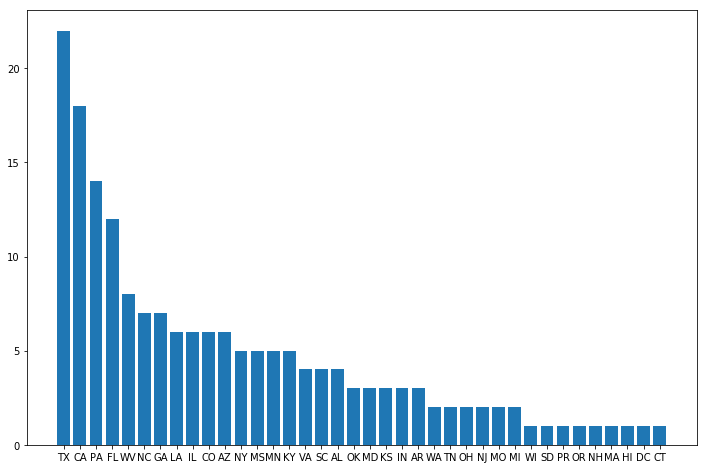

In [52]:
state_bag = {}
for state in bop_facilities["state"]:
    state_bag[state] = state_bag.get(state, 0) + 1
state_freq = sorted(state_bag.items(), key=lambda kv:(kv[1], kv[0]), reverse=True)
x = [s[0] for s in state_freq]
y = [s[1] for s in state_freq]
plt.figure(figsize = (12, 8))
plt.bar(x, y)
plt.show();

In [53]:
state_bag

{'MS': 5,
 'WV': 8,
 'AL': 4,
 'PA': 14,
 'KY': 5,
 'GA': 7,
 'CA': 18,
 'MD': 3,
 'TX': 22,
 'SC': 4,
 'NH': 1,
 'NY': 5,
 'NC': 7,
 'DC': 1,
 'IL': 6,
 'OH': 2,
 'FL': 12,
 'CT': 1,
 'MI': 2,
 'MA': 1,
 'MN': 5,
 'OK': 3,
 'CO': 6,
 'NJ': 2,
 'AR': 3,
 'PR': 1,
 'HI': 1,
 'KS': 3,
 'VA': 4,
 'TN': 2,
 'LA': 6,
 'WI': 1,
 'AZ': 6,
 'WA': 2,
 'OR': 1,
 'MO': 2,
 'IN': 3,
 'SD': 1}

In [54]:
state_freq = sorted(state_bag.items(), key=lambda kv:(kv[1], kv[0]), reverse=True)

In [55]:
x = [s[0] for s in state_freq]
y = [s[1] for s in state_freq]
print(x, y)

['TX', 'CA', 'PA', 'FL', 'WV', 'NC', 'GA', 'LA', 'IL', 'CO', 'AZ', 'NY', 'MS', 'MN', 'KY', 'VA', 'SC', 'AL', 'OK', 'MD', 'KS', 'IN', 'AR', 'WA', 'TN', 'OH', 'NJ', 'MO', 'MI', 'WI', 'SD', 'PR', 'OR', 'NH', 'MA', 'HI', 'DC', 'CT'] [22, 18, 14, 12, 8, 7, 7, 6, 6, 6, 6, 5, 5, 5, 5, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]


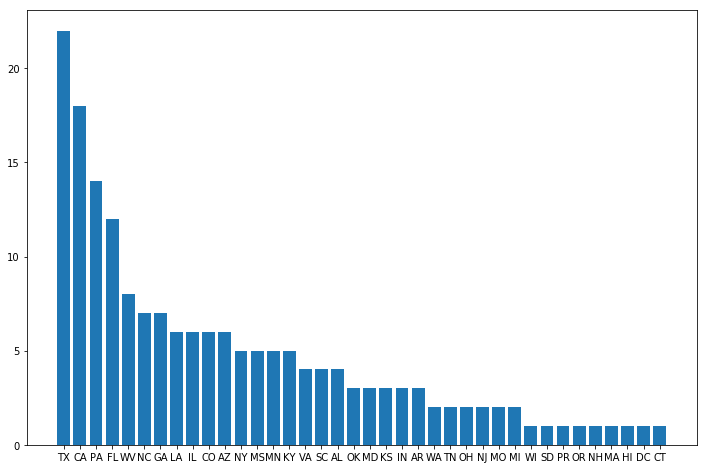

In [56]:
plt.figure(figsize = (12, 8))
plt.bar(x, y)
plt.show();

In [60]:
np.array(y).mean()

4.7368421052631575